## PyTorch Neural Network Classification
- Binary Classification 0 or 1
- Multi-Class Classification > 2 Class
- Multi-Label Classification > Targets can be assignmed more than one option examples picture with fruits and meat where fruit is the categories inside the fruits there might be organge, citrus,apple and so on...

set of inputs --> f(x) ---> g(x) --> 0 or 1 or target class prediction (classification)

In [92]:
from sklearn.datasets import make_circles  # creating two circles to generate two circles with different coloured dots
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn
import torch.optim as optim
import requests
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix, precision_score,recall_score, f1_score


In [5]:

# make 1000 samples
n_samples = 1000

X,y = make_circles(n_samples, noise=0.05, random_state = 32)

print(f"First 5 X features: {X[:5]}")
print(f"First 5 y labels: {y[:5]}")

# visualization, and putting them into pandas
circles = pd.DataFrame({
    "X1": X[:, 0], # (all values from the first column) from our case [start:end:step]
    "X2": X[:, 1],
    "label": y
})
circles.head(10)
print("-----------------------------------")
print("PERFECT EXAMPLE OF BINARY CLASSIFICATION TARGET AND INPUT X")

circles.label.value_counts()
print("For now it is balanced dataset")

First 5 X features: [[-0.07410501  0.72813172]
 [-0.49113735  0.51014506]
 [-0.425731   -0.69004113]
 [-0.6400004   0.62564348]
 [-0.52684488 -0.66346375]]
First 5 y labels: [1 1 1 0 1]
-----------------------------------
PERFECT EXAMPLE OF BINARY CLASSIFICATION TARGET AND INPUT X
For now it is balanced dataset


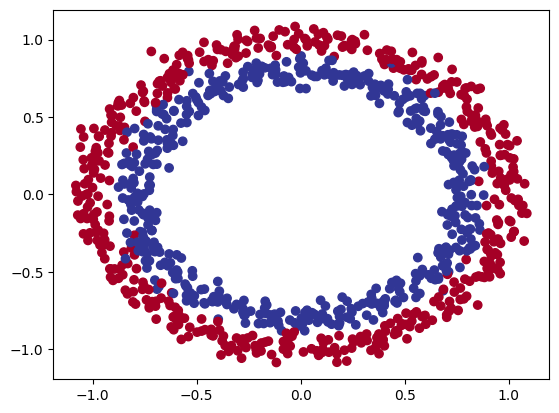

In [6]:
# visualize them
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],y = X[:, 1], c= y,cmap= plt.cm.RdYlBu)

In [13]:
# Let's check the shapes of x and y
X.shape, y.shape

# view thefirst example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y {y_sample.shape}")
print(""" Shapes for one sample of X: (2,) and the same for y: ()
This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).
""")
print("so We have two inputs for one output.")



Sample for one sample of X: [-0.07410501  0.72813172] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y ()
 Shapes for one sample of X: (2,) and the same for y: ()
This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).

so We have two inputs for one output.


# Turn data into tensors and create train and test splits
Dataset into two -- 1. training and testing and also validations

80% 20% spliting format.


In [32]:
# turn data into tensors and we also use NumPy Arrays
# Skip conversion if already a tensor
X = X.type(torch.float)
y = y.type(torch.float)

# view the first five samples
X[:5], y[:5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

print(len(X_train), len(X_test), len(y_train), len(y_test))

700 300 700 300


## Building a Model
- setup device detect cpu or gpu or mps
- construct a model by subclassing nn.Module
- define loss f(x)and optimizer like Adam or SGD
- creating a training loop

#### Supervised Learning
given x predict the known label y. Let's neural network or model

- nn.Module
- nn.Linear Linears 2 handles input and output SHAPES Of X and y.
- forward() --> forward propgation
- model classs is instantiated and sends it to the target device like CPU, GPU or MPS


In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device available is ", device)


# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
   def __init__(self): # class constructor method with self keyword instance pointer of the parent class
      super().__init__() # super is also specialize method that create a temporary objects of the parent class

      # 2. Creat 2 nn.Linear layers capable of handling X and y Input and Output shapes
      self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes 2 features of  X, produces 5 output
      self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes 5 input features and output 1 output

   # 3. Define a forward method containing the forward pass computation
   def forward(self, x):
    # returning the output of layer 2a single features with the same shape as y
    return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

#4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
print(model_0)

Device available is  cpu
CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


### We can do this using the nn.Sequential that performs forward pass computation of the input data through the layers in the order they appear.


In [41]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

print(model_0)
print("why nn.Sequential because it is straight-forward and always runs in a sequential order")

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)
why nn.Sequential because it is straight-forward and always runs in a sequential order


In [44]:
# Make predictions with the Model
untrained_preds = model_0(X_test.to(device))
print(untrained_preds.T)

print(f"Predictions length: , {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"First n test labels: {y_test[:5]}")


tensor([[ 0.5304, -0.5082, -0.3744, -0.3882,  0.7566,  0.2962,  0.4658, -0.5018,
          0.9191,  0.7751, -0.4106, -0.3222,  0.4153, -0.6297,  0.8799, -0.1440,
          0.0518, -0.5980,  0.5743,  0.0386,  0.0236,  0.8725,  0.3761, -0.4814,
         -0.5905, -0.0113, -0.4188, -0.0481, -0.2408,  0.4800,  0.7492,  0.7243,
         -0.3143,  0.9360, -0.4979,  0.8495, -0.4056,  0.4624,  0.5072,  0.6738,
         -0.4530,  0.3363,  0.6328, -0.0756, -0.4695, -0.4161, -0.6448,  0.7976,
          0.7714, -0.3856,  0.3303,  0.8556,  0.7275,  0.2204,  0.9603,  0.0971,
         -0.2666, -0.4756, -0.1298, -0.5632,  0.1719, -0.1247,  0.8290, -0.0109,
         -0.3538,  0.9190,  0.1637, -0.3923, -0.4589,  0.6151,  0.3668, -0.0528,
         -0.5013,  0.0429,  0.0834, -0.6485,  0.4224, -0.6335,  0.8160,  0.7693,
          0.3669,  0.8791,  0.1320,  0.5057, -0.4554,  0.8833,  0.0246,  0.7053,
          0.5294, -0.6114, -0.2109, -0.5425,  0.2932, -0.2063, -0.1082, -0.6680,
         -0.1279,  0.5349, -

# Building a training and testing loop
## Training model with non-linearlity in pytorch
lets create a training and testing loop


squeeze: Removes all dimensions (or a specified dimension) of size 1 from a tensor.

unsqueeze: Adds a dimension of size 1 at a specified position.

Squeeze: remove only dimension 0 if it is size 1

Squeeze: remove all dimensions of size 1

Unsqueeze: add a dimension of size 1 at position 0

Unsqueeze: add a dimension of size 1 at position 2

x = torch.rand(1,3,1,4)
print(x)


tensor
([[[[0.8823, 0.9150, 0.3829, 0.9593]],

         [[0.3904, 0.6009, 0.2566, 0.7936]],

         [[0.9408, 0.1332, 0.9346, 0.5936]]]])


1 → Often used as a batch size (only one sample in this case)

3 → Could represent channels (like RGB for images)

1 → A singleton dimension (can be removed or added using squeeze/unsqueeze)

4 → Could represent width or features



In [48]:
x = torch.rand(1,3,1,4)
print(x)
print(x.shape)

#Squeeze: remove all dimensions of size 1
y = x.squeeze()
print(y.shape, y)

tensor([[[[0.1053, 0.2695, 0.3588, 0.1994]],

         [[0.5472, 0.0062, 0.9516, 0.0753]],

         [[0.8860, 0.5832, 0.3376, 0.8090]]]])
torch.Size([1, 3, 1, 4])
torch.Size([3, 4]) tensor([[0.1053, 0.2695, 0.3588, 0.1994],
        [0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090]])


In [100]:
torch.manual_seed(42)

# set the number of epochs
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

loss_fn = nn.BCEWithLogitsLoss()  # good for binary classification


def accuracy_fn(y_true, y_pred):
  correct = (y_true == y_pred).sum().item()
  acc = correct / len(y_true)* 100
  return acc

optimizer = optim.SGD(model_0.parameters(), lr = 0.01)

# Build the trianing and evaluation loop
for epoch in range(epochs):
   ## training
   model_0.train()

   # 1. Forward Pass
   y_logits = model_0(X_train).squeeze() #squeeze to remove extra '1' dimensions,
   y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

   # 2. Calculate loss/accuract
   loss = loss_fn(y_logits, y_train)
   acc = accuracy_fn(y_true=y_train,y_pred = y_pred)

   # optimzer zero grad
   optimizer.zero_grad()

   # 4. Loss backwards
   loss.backward()

   # 5. optimizer step
   optimizer.step()


   # testing
   model_0.eval()
   with torch.inference_mode():
     # 1.Forward Pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # 2. Calculate loss/accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

      # convert tensors to cpy numpy arrays for sklearn
      y_true_np = y_test.cpu().numpy()
      y_pred_np = test_pred.cpu().numpy()

      # extrac metrics
      precision = precision_score(y_true_np, y_pred_np)
      recall = recall_score(y_true_np, y_pred_np)
      f1 = f1_score(y_true_np, y_pred_np)
      # print out what's happening every 10 epochs
      if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Loss: {loss: 5f}, Accuracy: {acc:2f} % | Test Loss:{test_loss:5f}, test acc: {test_acc:2f}%")
        print(f"Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")
        print("-=============================")


Epoch: 0 | Loss:  0.692380, Accuracy: 52.857143 % | Test Loss:0.697523, test acc: 47.000000%
Precision: 0.46 | Recall: 0.55 | F1-score: 0.50
-=============================
Epoch: 50 | Loss:  0.692378, Accuracy: 52.857143 % | Test Loss:0.697518, test acc: 47.000000%
Precision: 0.46 | Recall: 0.55 | F1-score: 0.50
-=============================
Epoch: 100 | Loss:  0.692377, Accuracy: 53.000000 % | Test Loss:0.697513, test acc: 47.000000%
Precision: 0.46 | Recall: 0.55 | F1-score: 0.50
-=============================
Epoch: 150 | Loss:  0.692376, Accuracy: 53.285714 % | Test Loss:0.697507, test acc: 47.333333%
Precision: 0.46 | Recall: 0.56 | F1-score: 0.50
-=============================
Epoch: 200 | Loss:  0.692375, Accuracy: 53.428571 % | Test Loss:0.697503, test acc: 47.333333%
Precision: 0.46 | Recall: 0.56 | F1-score: 0.50
-=============================
Epoch: 250 | Loss:  0.692374, Accuracy: 53.142857 % | Test Loss:0.697498, test acc: 47.333333%
Precision: 0.46 | Recall: 0.56 | F1-sc

## Making PREDICTIONS AND EVALUATE THE MODEL



Helper functions.py already exist. skip download
              precision    recall  f1-score   support

         0.0     0.4800    0.3846    0.4270       156
         1.0     0.4514    0.5486    0.4953       144

    accuracy                         0.4633       300
   macro avg     0.4657    0.4666    0.4612       300
weighted avg     0.4663    0.4633    0.4598       300



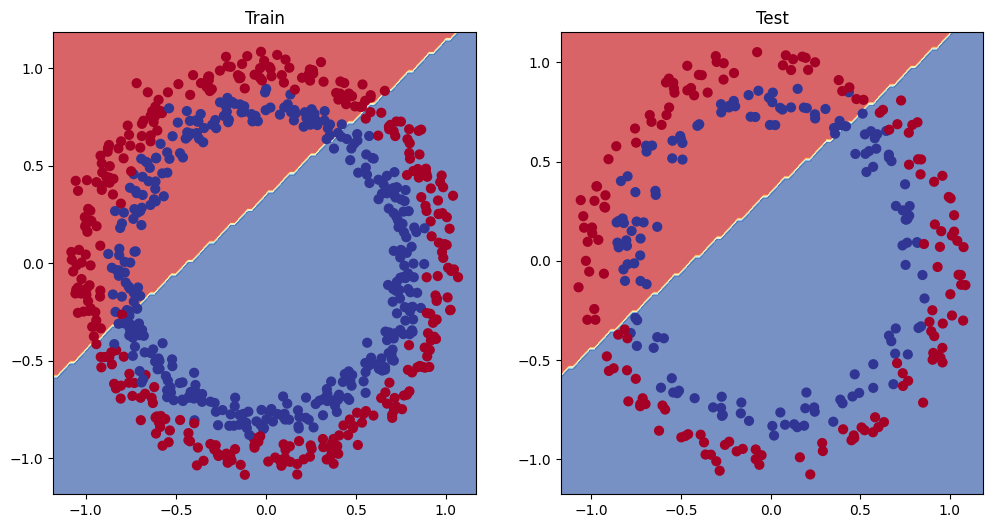

In [103]:
from helper_functions import plot_predictions, plot_decision_boundary
import requests
from pathlib import Path

# helper functions
if Path("helper_functions.py").is_file():
  print("Helper functions.py already exist. skip download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py") # you can use your own i am using from tutorial
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


#plot decision boundaries for trian and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  # plt.subplot(nrows, ncols, index) means 1 -> rows, 2->cols,1 -> index of the plot to activate counting from left to right, top to bottom

plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


y_true_np = y_test.cpu().numpy()
y_pred_np = test_pred.cpu().numpy()

print(classification_report(y_true_np, y_pred_np, digits=4))


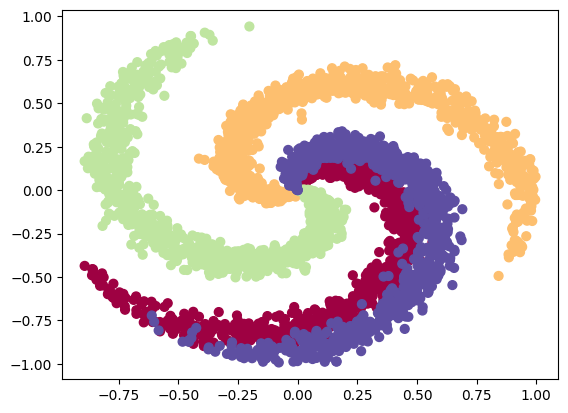

In [90]:
# Lets create a spiral
import numpy as np
N = 1000 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()